In [1]:
from typing import List
import warnings

import numpy as np
import geopandas as gpd
import rasterio
import pandas as pd
from shapely.geometry import LineString, Point
from shapely.errors import ShapelyDeprecationWarning
import matplotlib.pyplot as plt
from scipy import ndimage

from scrollstats.config import DB_PW
from scrollstats import BendDataset, calculate_ridge_metrics, calc_dist

In [2]:
bend_id = "LBR_025"

# Get rasters
dem = rasterio.open("/Users/avan/FLUD/BrazosScrolls/data/raster/dem/sb_1_025_clip.tif")
bin_raster = rasterio.open("/Users/avan/FLUD/BrazosScrolls/data/r10/agreement-clip-denoise/sb_1_025_agreement_45px_binclass_clip_dn_Buff100m_SmFt500m_ET80p.tif")

# Get vectors
bend_ds = BendDataset(bend_id)
ridges = bend_ds.get_ridges(True)
transects = bend_ds.get_transects(True)

## Extract data along transects

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ShapelyDeprecationWarning)
    rich_transects, itx = calculate_ridge_metrics(transects, bin_raster, dem, ridges)
    
rich_transects.head()

Started BDE
Started TDE for t_009
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_010
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_011
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_012
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_013
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_014
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_015
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_016
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started 

,transect_id,bend_id,cl_distance,length,num_coords,shoot_distance,search_distance,dev_from_90,geometry,r_000,...,r_021,r_022,r_023,dem_signal,bin_signal,clean_bin_signal,ridge_count_raster,fft_spacing,amp_signal,fft_amps
0,t_009,LBR_025,551.487241,521.697579,10,300,200,5,"LINESTRING (838955.420 4310869.288, 839071.179...",NaN,...,196.690242,NaN,446.144814,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",7,234.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",261.0
1,t_010,LBR_025,619.698817,539.611592,10,300,200,5,"LINESTRING (838966.055 4310802.081, 839082.539...",NaN,...,223.913145,NaN,464.515721,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",9,50.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",49.0
2,t_011,LBR_025,686.840844,562.203836,11,300,200,5,"LINESTRING (838991.210 4310739.971, 839077.313...",92.980005,...,255.027040,NaN,486.858447,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10,76.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",80.0
3,t_012,LBR_025,751.005958,569.387565,11,300,200,5,"LINESTRING (839026.585 4310686.543, 839094.098...",80.106317,...,267.531844,NaN,493.620972,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10,86.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",569.0
4,t_013,LBR_025,813.920130,585.131969,11,300,200,5,"LINESTRING (839069.628 4310640.755, 839090.739...",98.064331,...,282.161356,NaN,509.681470,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10,59.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",584.0


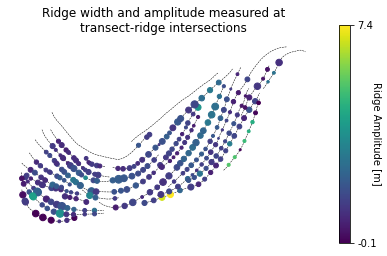

In [5]:
fig, ax = plt.subplots(1,1, figsize=(7,4))

itx.plot(ax=ax, column="ridge_amp", markersize="ridge_width", legend=True)
ridges.plot(ax=ax, color="k", ls="--", lw=0.5, zorder=0)

cbar = fig.axes[1]
min_max = itx["ridge_amp"].quantile([0,1])
cbar.set_yticks(min_max, labels = np.round(min_max, 1))

cbar.set_ylabel("Ridge Amplitude [m]", rotation=270)

ax.set_title("Ridge width and amplitude measured at\ntransect-ridge intersections")
ax.set_axis_off()
# plt.savefig("/Users/avan/FLUD/BrazosScrolls/figures/WidthAndAmpAtItx_newmethod.png", dpi=300)